# StackOverFlow Tag Network Visualization and Analysis Outline : 

* Making the network
* Network Visualization
* Finding Cliques 
* Visualizing Maximal Clique 
* Visualizing SubGraph of Programming Languages
* Degree Distribution 
* Node metadata distributions(group and nodesize)
* Centrality Measures (degree and betweenness centrality)


# Build Network

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nodes = pd.read_csv('stack_network_nodes.csv')
edges = pd.read_csv('stack_network_links.csv')

In [3]:
nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [4]:
edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


A graph consists of nodes and edges.  In this case the nodes are the tags that appear in a developer's profile in stackoverflow ["Developer Stories"](https://stackoverflow.com/users/story/join). If two tags appear on the same profile there's a tag between them.  To build a graph in networkx first we define an empty graph. Then we add the nodes and the edges to the graph from the dataframes ```nodes``` and ```edges``` by iterating over the rows. 

> The dataset include only a subset of tags used on Developer Stories, tags that were used by at least 0.5% of users and were correlated with another tag with a correlation coefficient above 0.1. This means that very sparsely used tags and tags that are not used with other tags were filtered out. 

For more details see here : https://www.kaggle.com/stackoverflow/stack-overflow-tag-network/discussion/41307

Nodes and edges can have metadata associated with them. 

**Node metadata : **
*  ```nodesize```  :  Proportional to how many developers have that tag in their developer story profile.
*  ```group``` : which group that node belongs to (calculated via a cluster walktrap).

**Edge metadata : **
*  ```value``` :  proportional to how correlated those two tags are (correlation coefficient * 100). 



In [5]:
G = nx.Graph()

In [6]:
for index, row in nodes.iterrows():
    G.add_node(row["name"],group = row["group"], nodesize = row["nodesize"] )

In [7]:
for index, row in edges.iterrows():
    G.add_edge(row["source"], row["target"], weight = row["value"])

After building the network the first thing to check is the number of nodes and edges it consists of.  ```nx.info(G)``` also shows us the average degree. Degree of a node in an undirected graph shows the number of nodes it's connected to. We can also consider indegrees(number of edges incoming) and outdegrees(number of edges outgoing) of nodes. Average degree is the average of all node's degree. Stackoverflow tags have an average degree of 4.26 which indicates that on average tags are connected to four other tags. 115 nodes mean there are 115 unique tags which are connected among themselves with 245 edges.

In [8]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609


# Connectivity 

A network is connected if there is a path between every pair of vertices. But this tag network is not connected, which means there are some isolated nodes or isolated subgraphs. A connected component is the maximal connected subgraph of a graph. In the tag network we have 6 unique connected components. We can also extract the largest connected component of a graph.

In [9]:
nx.is_connected(G)

False

In [41]:
nx.number_connected_components(G)

6

In [39]:
maximum_connected_component = max(nx.connected_component_subgraphs(G), key=len)

# Network Visualization

Note : I've used the code in this kernel : https://www.kaggle.com/jncharon/python-network-graph for the network visualization by encapsulating it in a function with minimal changes for convenience. I've changed the syntax for the list comprehensions for assigning node color and also changed the parameters for the spring layout a little bit. We can see the different connected components in the graph, often consisting of 2-3 edges. E.g (excel, excel-vba) and (testing, selenium) which probably refers to the business analysists and Quality assurance developers.

In [12]:
print(nx.__version__)

2.2


In [13]:
def draw_graph(G,size):
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,node_color=node_color,node_size=node_size,edge_color='#FFDEA2',edge_width=1)
    plt.show()

/Users/bookman/anaconda3/envs/SNA_FKN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


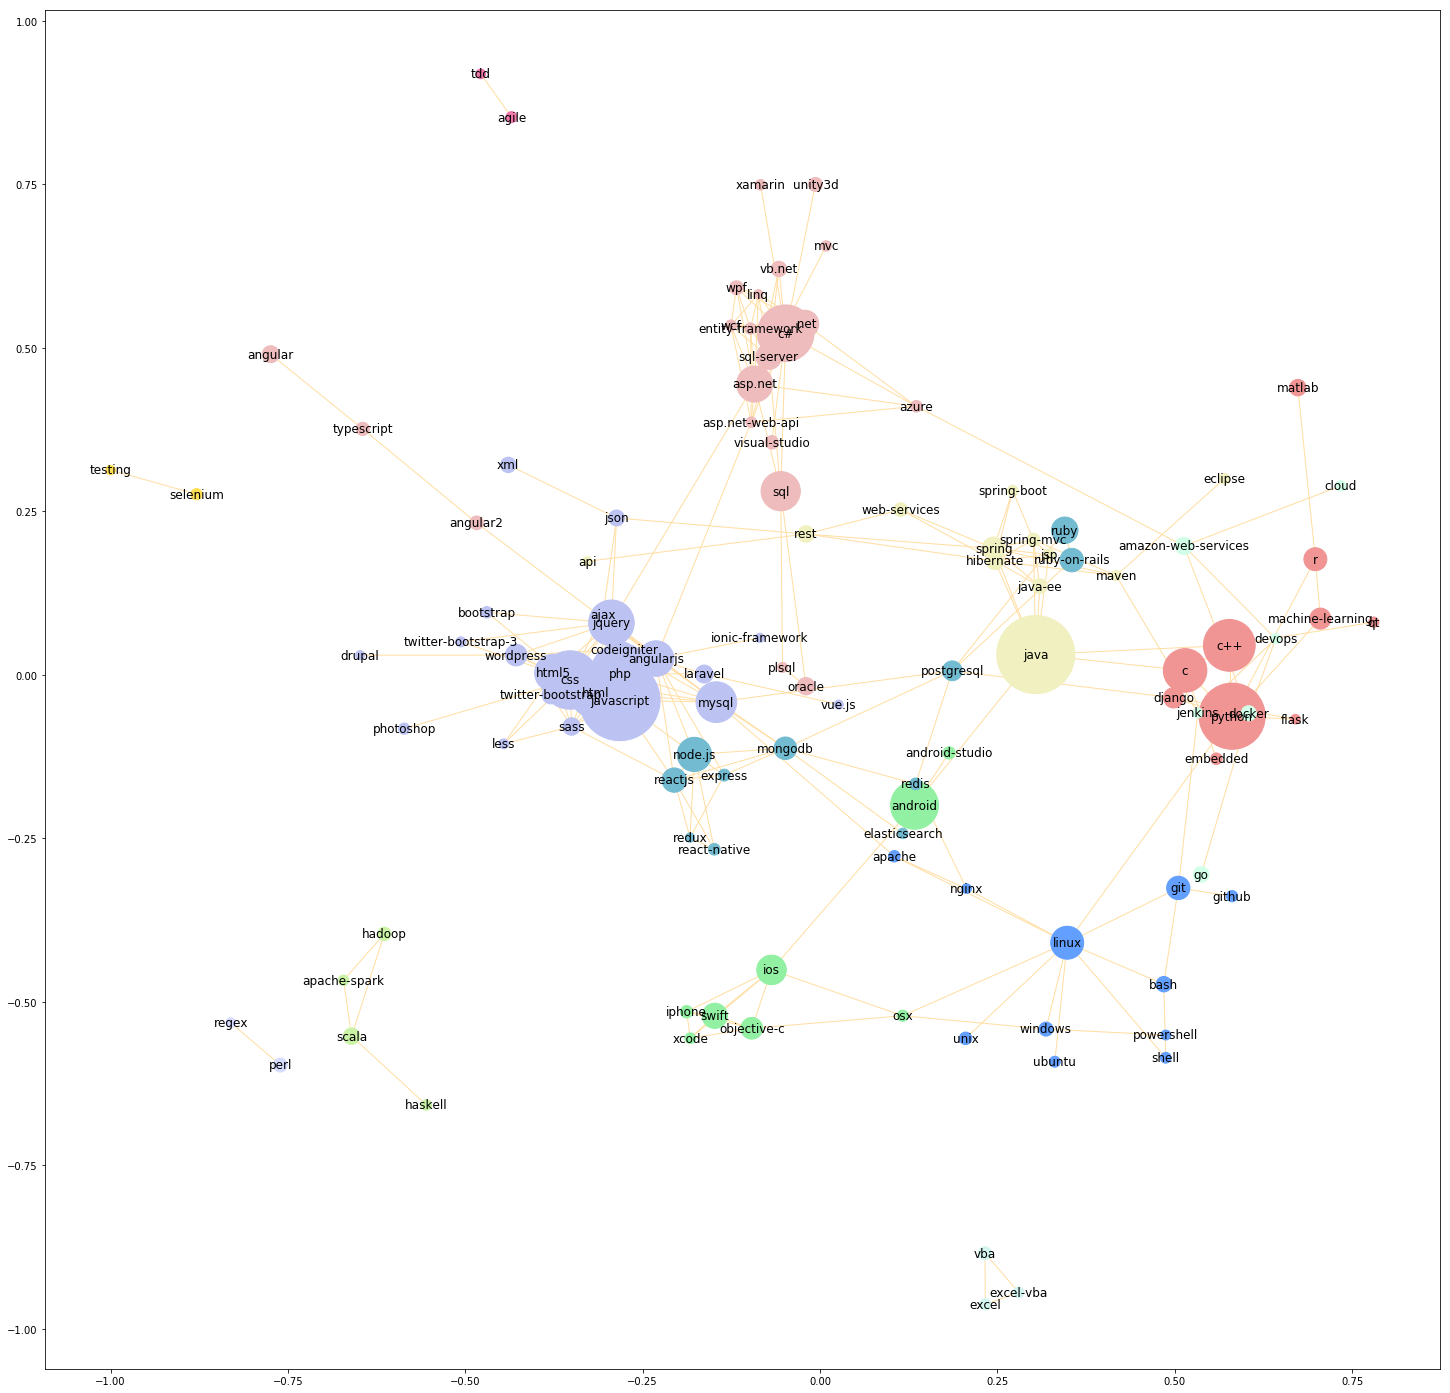

In [14]:
draw_graph(G,size=(25,25))

# Cliques 

In general we consider cliques as groups of people who are closely connected to each other but not connected to people outside the group. In network theory a clique is defined as a maximal complete subgraph of a graph where each node is connected to all the other nodes. The word 'maximal' means that if we add another node to the clique the clique will cease to be a clique. ```nx.find_cliques``` finds all the cliques in a network. We can also extract all the cliques from the tag network. 

In [42]:
cliques = list(nx.find_cliques(G))

In [43]:
clique_number = len(list(cliques))
print(clique_number)

89


In [44]:
for clique in cliques:
    print(clique)

['ubuntu', 'linux']
['android', 'android-studio']
['android', 'ios']
['android', 'java']
['cloud', 'amazon-web-services']
['spring-boot', 'hibernate', 'spring-mvc', 'spring']
['qt', 'c++']
['shell', 'linux', 'bash']
['agile', 'tdd']
['jenkins', 'devops', 'docker']
['jenkins', 'maven']
['jenkins', 'git']
['xcode', 'iphone', 'objective-c', 'swift', 'ios']
['mvc', 'asp.net']
['entity-framework', 'wcf', 'asp.net', 'c#', 'asp.net-web-api', 'sql-server']
['entity-framework', 'wcf', 'asp.net', 'c#', '.net', 'linq', 'sql-server']
['entity-framework', 'wcf', 'asp.net', 'c#', '.net', 'linq', 'wpf']
['spring', 'hibernate', 'web-services', 'rest']
['spring', 'hibernate', 'spring-mvc', 'maven']
['spring', 'hibernate', 'spring-mvc', 'java', 'java-ee']
['spring', 'hibernate', 'spring-mvc', 'java', 'jsp']
['powershell', 'windows']
['python', 'linux']
['python', 'r', 'machine-learning']
['python', 'flask', 'django']
['python', 'c++', 'c']
['unity3d', 'c#']
['apache', 'nginx', 'linux']
['apache', 'mysql

# Language Specific Ego Network And Cliques 

For each programming language there's a tag in the network. E.g 'python' will refer to the python language. So we can check the cliques that contains that node. We can also visualize the ego network for a node. Ego network for a node is the subgraph containing that node and all its neighbors with a specifed depth range. 

For example, we can check the ego network for python with radius 2, which means that we get the subgraph containing python and all it's direct neighbors which are 1 edge away from python  and also the nodes which are 2 hop away from python. 

Ego networks can be used for checking shortest paths or generally conducting analysis of who is connected to whom, but cliques are helpful because it shows us the data in a more granular way. 

In [45]:
print(nx.ego_graph(G,'python',radius=2).nodes())

['ubuntu', 'bash', 'qt', 'shell', 'python', 'osx', 'apache', 'embedded', 'linux', 'flask', 'machine-learning', 'nginx', 'java', 'windows', 'c++', 'django', 'c', 'git', 'unix', 'matlab', 'r', 'postgresql']


Python participates in 4 different cliques,  one for web development with django and flask, one for open source development presumably which is connected to linux. One for machine learning where it's adjacent to R. I think the fourth one is for porting python and C/C++ back and forth.

In [46]:
nx.algorithms.clique.cliques_containing_node(G,"python")

[['python', 'linux'],
 ['python', 'r', 'machine-learning'],
 ['python', 'flask', 'django'],
 ['python', 'c++', 'c']]

In [20]:
nx.algorithms.clique.cliques_containing_node(G,"c++")

[['qt', 'c++'], ['python', 'c++', 'c'], ['c++', 'c', 'java']]

In [21]:
nx.algorithms.clique.cliques_containing_node(G,"php")

[['jquery', 'css', 'wordpress', 'php', 'html5'],
 ['jquery', 'css', 'javascript', 'php', 'html5'],
 ['jquery', 'css', 'javascript', 'php', 'mysql', 'ajax'],
 ['jquery', 'css', 'javascript', 'php', 'mysql', 'html'],
 ['jquery', 'codeigniter', 'php', 'ajax', 'mysql'],
 ['jquery', 'codeigniter', 'php', 'wordpress'],
 ['laravel', 'php', 'mysql', 'codeigniter']]

# Visualize Maximal Clique

It's possible that visualizing the largest cliques will let us see some pattern in the data. After finding all the cliques here we sort them by the length(number of nodes in that clique) and draw the cliques with the maximum length. ```G.subgraph``` allows us to extract a subgraph from the graph by passing a list of nodes. We have 3 cliques of size 7 which are the biggest, however I've only taken the unique nodes in a set while extracting the subgraphs, so we can see two different clusters containing javascript and .net related tags.

In [47]:
sorted_cliques = sorted(list(nx.find_cliques(G)),key=len)

In [23]:
max_clique_nodes = set()

for nodelist in sorted_cliques[-4:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)

In [24]:
max_clique = G.subgraph(max_clique_nodes)

In [25]:
print(nx.info(max_clique))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 43
Average degree:   6.1429


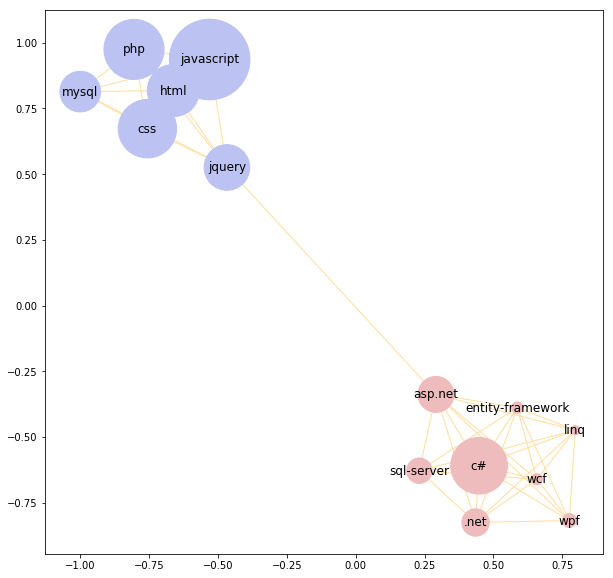

In [26]:
draw_graph(max_clique,size=(10,10))

# Visualizing Programming Language Network

Since it's possible to draw the subgraph of a graph, a subgraph containing the nodes for the programming languages only can also be visualized.  In the visualization its possible to see the different clusters for each programming language and familiar patterns like android with java or embedded systems with C and C++.

In [27]:
major_languages = ['c','c++','c#','java','python','ruby','scala','haskell','javascript','sql']

In [28]:
p_language_nodes = []
for language in major_languages:
    neighbors = G.neighbors(language)
    p_language_nodes.extend(neighbors)

In [29]:
programming_language_graph = G.subgraph(set(p_language_nodes))

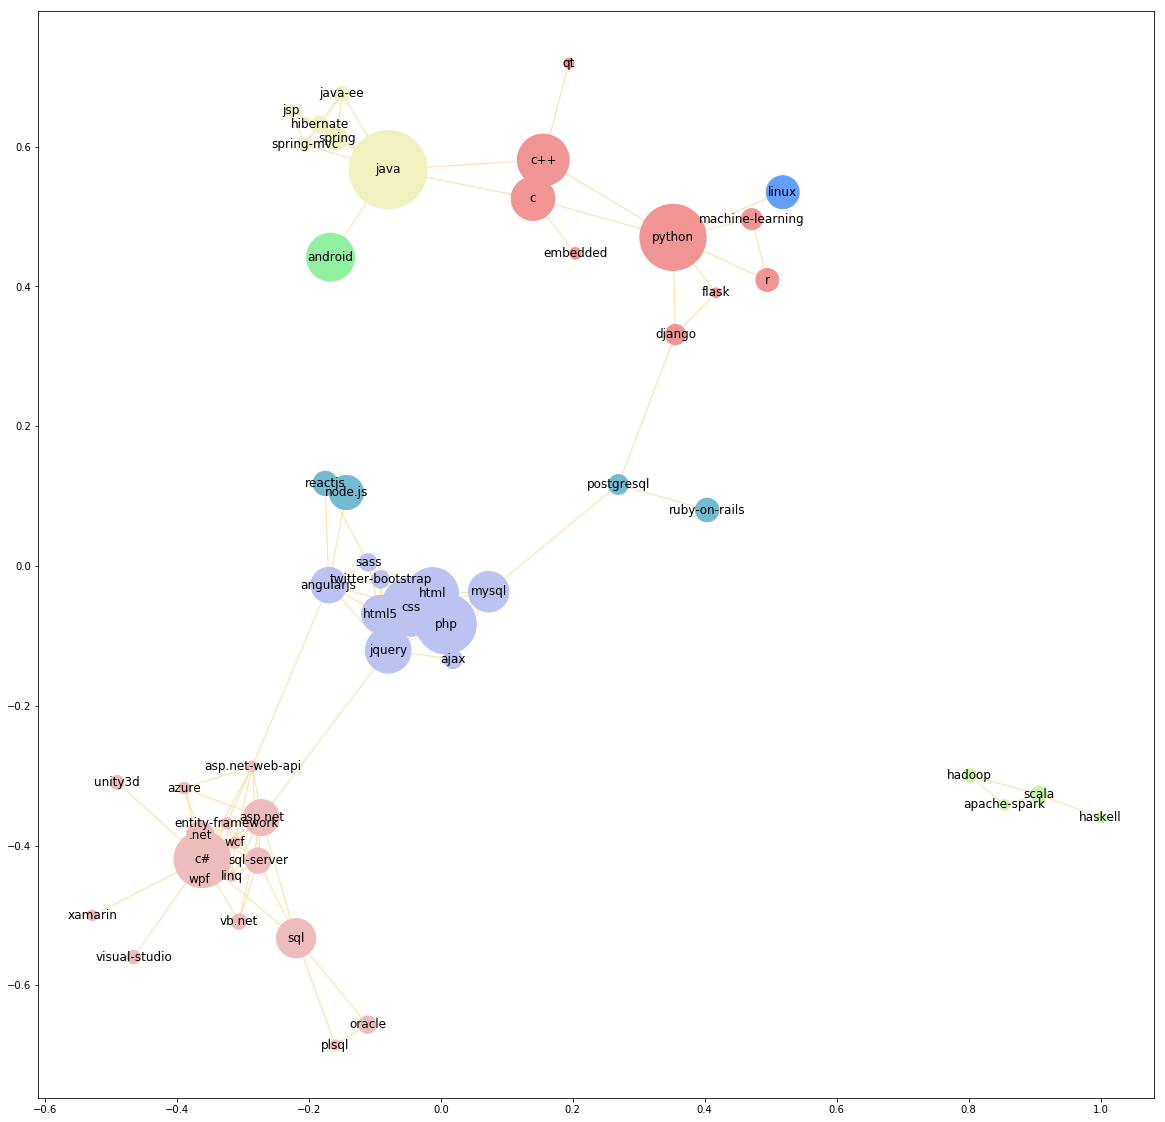

In [30]:
draw_graph(programming_language_graph,size=(20,20))


# Degree Distribution 

For checking the degree distribution of the graph plotting the list containing degrees for each node works. In the tag network clearly most tags hae only 1 or 2 neighbors while some tags are linked to more than 10-12 tags.

Text(0.5, 1.0, 'Stack Overflow Tag Degree Distribution')

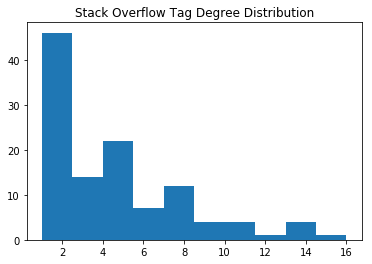

In [31]:
plt.hist([node[1] for node in list(G.degree())])
plt.title("Stack Overflow Tag Degree Distribution")

# Group Distribution 

For this network since the group numbers are provided it's possible to check how many tags fall into each group. Group 6 and 1 has the highest number of nodes falling into them while group 10-12 probably refers to the isolated nodes.

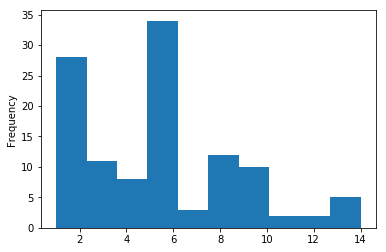

In [32]:
nodes['group'].plot(kind='hist')

# Node size distribution 

Again, since the node size metadata is provided it's possible to check the node size distribution.

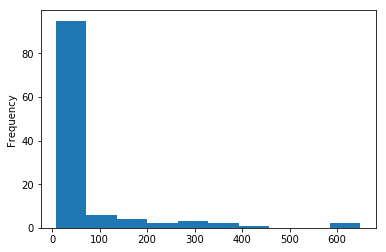

In [33]:
nodes['nodesize'].plot(kind="hist")

# Centrality Measures

Centrality measures helps us to idenfity the most important nodes or vertices in a graph. Different centrality measures like degree centrality, betweenness centrality, eigenvector centrality are used to measure influence of nodes in a network.


* **Degree Centrality : ** Degree centrality of a node is the fraction of the nodes it's connected to. Intuitively, the greater the degree that node can be more powerful. For example we can think that a twitter celebrity with 1 m follower is more influential than a regular user with 100 followers.

* **Betweenness Centrality :** Betweenness centrality is a measure of centrality in a graph based on the idea of shortest path. Betwenness centrality of node A is fraction of shortest paths that passes through node A. Nodes with high betweeness centrality works as the 'power broker' or the 'bridges' between different isolated parts of a network.

Here we idenfity the top 10 nodes according to both of the centraliy measures, but they overlap a lot , presumably because it's just a co-occurance network of tags and undirected. In a human social network often the people with higher betweenenss centrality are more interesting.

In [34]:
degree_centrality = nx.degree_centrality(G)

In [35]:

top_10_nodes_by_degree_centrality = sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

top_10_nodes_by_degree_centrality

[('jquery', 0.14035087719298245),
 ('css', 0.12280701754385964),
 ('c#', 0.12280701754385964),
 ('asp.net', 0.11403508771929824),
 ('angularjs', 0.11403508771929824),
 ('javascript', 0.10526315789473684),
 ('mysql', 0.09649122807017543),
 ('html5', 0.08771929824561403),
 ('php', 0.08771929824561403),
 ('linux', 0.08771929824561403)]

In [48]:
betweenness_centrality = nx.betweenness_centrality(G)


In [37]:
top_10_nodes_by_betweenness_centrality = sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

In [49]:
top_10_nodes_by_betweenness_centrality

[('jquery', 0.2555399753457234),
 ('linux', 0.20840160874161803),
 ('mysql', 0.1976931477327379),
 ('asp.net', 0.17406690608353667),
 ('apache', 0.13087186063431988),
 ('json', 0.12319763505138448),
 ('angularjs', 0.12286762799187795),
 ('rest', 0.11370118004957315),
 ('python', 0.11018306022497917),
 ('postgresql', 0.08761830339613291)]

# More Resources : 

* Datacamp Network Analysis Course Part 1 and 2.
* https://github.com/ericmjl/Network-Analysis-Made-Simple
